In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the datasets from tf.keras.datasets database

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = tf.constant(train_images, dtype = tf.float32)
train_labels = tf.constant(train_labels, dtype = tf.float32)

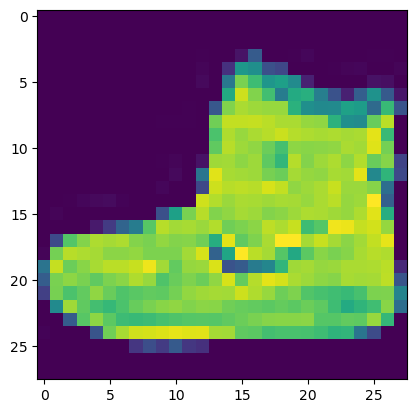

In [3]:
# Preprocess the data and visualise the data
plt.imshow(train_images[0]) #change the index and visualise some more images to get an idea

In [4]:
# divide the train and test data by 255 because each pixel value lies between 0 and 255, so we are normalising the data
# train/255.

train_images, test_images = train_images/255.0, test_images/255.0


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001),
            metrics = ['accuracy'])



In [6]:
# Define data augmentation for improved generalization 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    rotation_range=15,  # Randomly rotate images
    zoom_range=0.1  # Randomly zoom in/out
)



In [7]:
# Train the model with early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)


In [8]:
history = model.fit(
    datagen.flow(
        tf.transpose(tf.expand_dims(train_images, axis=1), perm=[0, 2, 3, 1]),
        np.squeeze(train_labels),
        batch_size=32
    ), 
    epochs=20,
    validation_data=(tf.transpose(tf.expand_dims(test_images, axis=1), perm=[0, 2, 3, 1]), np.squeeze(test_labels)),
    callbacks=[early_stopping, lr]
)


Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8572 - accuracy: 0.6897 - val_loss: 0.5861 - val_accuracy: 0.7824 - lr: 1.0000e-04
Epoch 2/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.6352 - accuracy: 0.7642 - val_loss: 0.5045 - val_accuracy: 0.8167 - lr: 1.1220e-04
Epoch 3/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5668 - accuracy: 0.7896 - val_loss: 0.4680 - val_accuracy: 0.8269 - lr: 1.2589e-04
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5223 - accuracy: 0.8051 - val_loss: 0.4323 - val_accuracy: 0.8459 - lr: 1.4125e-04
Epoch 5/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4919 - accuracy: 0.8188 - val_loss: 0.4450 - val_accuracy: 0.8340 - lr: 1.5849e-04
Epoch 6/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4648 - accuracy: 0.8274 - val_loss: 0.4185 - val_accuracy: 0.8494 - lr: 1.7783e-04
Epoch 7/20
1875/1875 [

In [9]:
# Evaluate the model's performance on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2841 - accuracy: 0.8989
Test accuracy: 0.8988999724388123


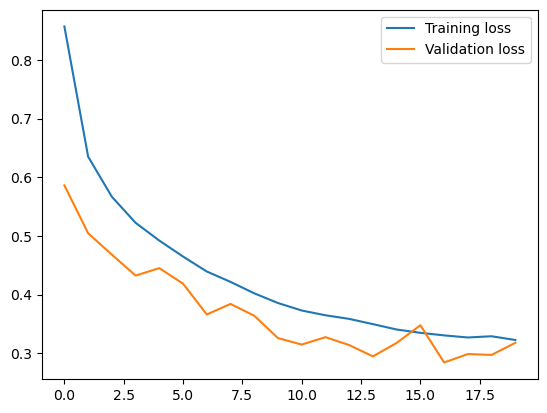

In [10]:
# Visualize training and validation loss/accuracy curves 
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

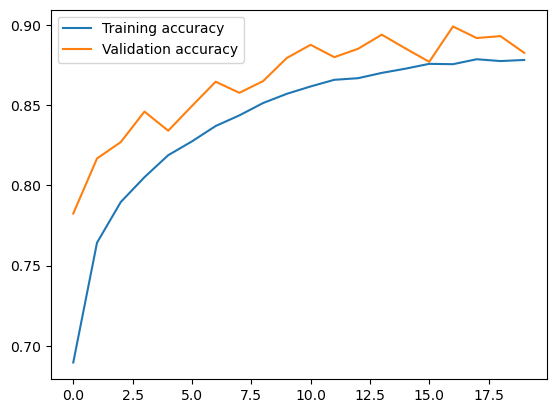

In [11]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

'\nloss and val_loss are particularly less,\nwhereas accuracy and val_accuracy are steeply increasing\n'

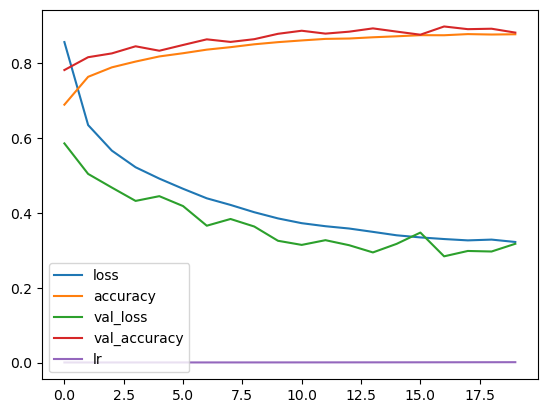

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot()

'''
loss and val_loss are particularly less,
whereas accuracy and val_accuracy are steeply increasing
'''


In [13]:
model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


array([[3.1734448e-08, 2.6723785e-09, 7.2858968e-09, ..., 2.4222878e-04,
        6.4863976e-08, 9.9953127e-01],
       [7.1919806e-07, 2.2535459e-13, 9.9999249e-01, ..., 7.8484353e-15,
        6.1594143e-08, 4.9875121e-12],
       [3.9927002e-08, 9.9999988e-01, 1.7418879e-08, ..., 2.0060751e-19,
        3.2846031e-10, 1.1279490e-12],
       ...,
       [4.8660723e-07, 3.4525662e-09, 2.0391620e-07, ..., 7.5214894e-13,
        9.9998283e-01, 6.8477141e-13],
       [1.2925811e-06, 9.9998748e-01, 9.5932057e-07, ..., 3.9926058e-15,
        5.8220477e-09, 7.3288803e-10],
       [2.5720918e-04, 1.9913803e-07, 1.7405154e-04, ..., 2.9409304e-01,
        3.4123998e-02, 2.9873829e-03]], dtype=float32)